## 작업표준+표준위험+위험벡터 데이터 프레임

In [1]:
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from konlpy.tag import Mecab
from keras.preprocessing.text import text_to_word_sequence
import time

mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [2]:
df = pd.read_excel('./data/standard.xlsx').fillna("")
df

,WORK_STAND_NM,WS_ID,WORK_UNIT,WORK_ACT,CHK_INFO,부서,대구분,중구분,소구분
0,CARGO TANK MEMB.의장설치 G/DOME,WS_1,작업 준비,자재 및 설치 위치 확인,,CHS공사부,LNG공사,MEMB,MEMB 의장설치
1,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Installation,Gas Dome 탑재,,CHS공사부,LNG공사,MEMB,MEMB 의장설치
2,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Installation,Gas Dome 우드링 설치,,CHS공사부,LNG공사,MEMB,MEMB 의장설치
3,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Installation,Gas Dome 용접(Tank in & out)/WPS 준수,,CHS공사부,LNG공사,MEMB,MEMB 의장설치
4,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Inspection,Gas Dome 설치 검사(Tank in & out)-설치도상 기준 충족,,CHS공사부,LNG공사,MEMB,MEMB 의장설치
...,...,...,...,...,...,...,...,...,...
23610,선실 판계(형강),WS_1382,형강 수정 용접,FCAW 수정 용접 (작업중 뒷걸음 절대 금지),,판넬조립부,판넬조립,선실,판계
23611,선실 판계(형강),WS_1382,형강 수정 용접,용접 수정부분 그라인딩 작업 - 전동 그라인더 사용(가죽 장갑 착용 철저),,판넬조립부,판넬조립,선실,판계
23612,선실 판계(형강),WS_1382,징크 도포,용접 부 징크 스프레이 도포,사용한 스프레이캔을 완전 소모후 천공(구멍)을 한 후 고철통에 폐기,판넬조립부,판넬조립,선실,판계
23613,선실 판계(형강),WS_1382,작업 정리,SLAG 청소 실시 (빗자루 및 쓰레받이 사용),,판넬조립부,판넬조립,선실,판계


In [3]:
df_act = df['WORK_ACT']+" "+df['CHK_INFO']   # 작업행동과 체크정보를 하나로 묶어서 키워드 분석
df_act.head()

0                               자재 및 설치 위치 확인 
1                                 Gas Dome 탑재 
2                             Gas Dome 우드링 설치 
3           Gas Dome 용접(Tank in & out)/WPS 준수 
4    Gas Dome 설치 검사(Tank in & out)-설치도상 기준 충족 
dtype: object

## 영어 단어 추출

In [66]:
# eng_results = []
# for sentence in tqdm(df_act):
#     sentence = str(sentence)
#     result = []
# #     tokenizer = RegexpTokenizer("[\w]+")
#     tokenizer = RegexpTokenizer("[^가-힣]+")
# #     tokenizer = RegexpTokenizer("[^가-힣0-9]+")   ## 숫자까지 제거
#     tokens = tokenizer.tokenize(sentence)

#     for token in tokens:
#         token = token.upper().strip().strip("(").strip(")").strip("/").strip("±").strip("mm").strip("?").strip("-").strip(".").strip(",").strip("~")
#         if token not in stop_word and token != '':
#             result.append(token)
#     eng_results.append(result)


In [67]:
# eng_results[200:300]

In [4]:
stop_word = "시 용 전 난 일 걸 뭐 줄 만 건 작업 분 위 개 끝 송 잼 이거 부 동 번 중 듯 차 때 게 내 말 나 수 거 점 것 등 뒤 도 측 의 급 의거 하 후 간 단 시 곳 에 인 조"
stop_word = stop_word.split(' ')

In [5]:
## 영어 단어 개별로 추출
eng_results = []
for sentence in tqdm(df_act):
    sentence = str(sentence)
    result = []
#     tokenizer = RegexpTokenizer("[\w]+")
    tokenizer = RegexpTokenizer("[^가-힣]+")
#     tokenizer = RegexpTokenizer("[^가-힣0-9]+")   ## 숫자까지 제거
    tokens = tokenizer.tokenize(sentence)
    for token_k in tokens:
        token = word_tokenize(token_k)
        for k in token: 
            k = k.upper().strip().strip("(").strip(",").strip("-").strip(")").strip("/").strip("±").strip("mm").strip("?").strip("-").strip(".").strip("~")
            if k not in stop_word and token != '':
                result.append(k)
    eng_results.append(result)

100%|███████████████████████████████████████████████████████████████████| 23615/23615 [00:05<00:00, 4425.47it/s]


In [6]:
len(eng_results)

23615

In [7]:
eng_results[0:20]

[[],
 ['GAS', 'DOME'],
 ['GAS', 'DOME'],
 ['GAS', 'DOME', '', 'TANK', 'IN', '&', 'OUT', '', 'WPS'],
 ['GAS', 'DOME', '', 'TANK', 'IN', '&', 'OUT', '', ''],
 ['GAS', 'POCKET', 'CROSSING', 'PIPE', 'FIT-UP'],
 ['GAS', 'POCKET', 'CROSSING', 'PIPE', 'WPS'],
 ['GAS', 'POCKET', 'CROSSING', 'PIPE', ''],
 [],
 ['PIPE', '', 'BAND', ''],
 ['PIPE'],
 ['L/DOME', 'PIPE', 'WPS', '', ''],
 ['6M', 'PIPE', 'BUTT', 'WPS', '', ''],
 ['PIPE', 'WPS', '', ''],
 ['BAND', 'GTT', 'SPEC', '', '', ''],
 ['GTT', 'SPEC', '', '', ''],
 [],
 ['PIPE', 'SUPPORT'],
 ['PIPE'],
 ['B', '', 'D', 'WALL', 'PIPE', 'BPS', '', '']]

## 한글 형태소 추출 (Mecab)

In [8]:
kor_results = []
for sentence in tqdm(df_act):
    sentence = str(sentence)
    result = []
    for noun in mecab.nouns(sentence):
        if noun not in stop_word:
            result.append(noun)
#     targets.append(sentence)
    kor_results.append(result)

100%|██████████████████████████████████████████████████████████████████| 23615/23615 [00:00<00:00, 26683.73it/s]


In [9]:
len(kor_results)

23615

### 한글-영문 키워드 통합

In [10]:
keywords = []
for i in range(len(kor_results)):
    keywords.append(eng_results[i]+kor_results[i])    

In [11]:
keywords[:20]

[['자재', '설치', '위치', '확인'],
 ['GAS', 'DOME', '탑재'],
 ['GAS', 'DOME', '우드링', '설치'],
 ['GAS', 'DOME', '', 'TANK', 'IN', '&', 'OUT', '', 'WPS', '용접', '준수'],
 ['GAS',
  'DOME',
  '',
  'TANK',
  'IN',
  '&',
  'OUT',
  '',
  '',
  '설치',
  '검사',
  '설치',
  '도상',
  '기준',
  '충족'],
 ['GAS', 'POCKET', 'CROSSING', 'PIPE', 'FIT-UP'],
 ['GAS', 'POCKET', 'CROSSING', 'PIPE', 'WPS', '용접', '준수'],
 ['GAS', 'POCKET', 'CROSSING', 'PIPE', '', '설치', '검사', '설치', '도상', '기준', '충족'],
 ['청소', '공기구', '정위치'],
 ['PIPE', '', 'BAND', '', '자재', '분류', '이동', '공기구', '준비'],
 ['PIPE', '끝단', '그라인딩'],
 ['L/DOME', 'PIPE', 'WPS', '', '', '상부', '용접', '만족', '별도', '참조'],
 ['6M', 'PIPE', 'BUTT', 'WPS', '', '', '선행', '용접', '만족', '별도', '참조'],
 ['PIPE', 'WPS', '', '', '단별', '연결', '용접', '만족', '별도', '참조'],
 ['BAND', 'GTT', 'SPEC', '', '', '', '리벳', '고정', '만족', '별도', '참조'],
 ['GTT', 'SPEC', '', '', '', '설치', '결과', '확인', '만족', '별도', '참조'],
 ['자재', '공기구', '정리'],
 ['PIPE', 'SUPPORT', '고정', '타입', '분류', '자재', '이동'],
 ['PIPE', '끝단', '그라인딩'],
 

### 데이터프레임에 통합

In [12]:
df['keyword'] = keywords

In [13]:
df['keyword'][:10]

0                                     [자재, 설치, 위치, 확인]
1                                      [GAS, DOME, 탑재]
2                                 [GAS, DOME, 우드링, 설치]
3       [GAS, DOME, , TANK, IN, &, OUT, , WPS, 용접, 준수]
4    [GAS, DOME, , TANK, IN, &, OUT, , , 설치, 검사, 설치...
5                [GAS, POCKET, CROSSING, PIPE, FIT-UP]
6           [GAS, POCKET, CROSSING, PIPE, WPS, 용접, 준수]
7    [GAS, POCKET, CROSSING, PIPE, , 설치, 검사, 설치, 도상...
8                                       [청소, 공기구, 정위치]
9                [PIPE, , BAND, , 자재, 분류, 이동, 공기구, 준비]
Name: keyword, dtype: object

## 표준위험 매칭

In [14]:
risks = pd.read_excel("./data/risk_factor.xlsx").fillna("")
risks

,id,위험구분,키워드,위험요인,사고유형1,사고유형2
0,idx_1297,LNG공사,"돔커버, DOME",펌프타워 상부 돔커버 관통 파이프 방호장치 미설치로 파이프 안으로 추락 위험,떨어짐,
1,idx_1364,LNG공사,"트러스, TRUSS",LNG 트러스 소모듈 조립시 훅 체결 불량으로 붕괴에 의한 깔림 위험,깔림,
2,idx_1360,LNG공사,"트러스, TRUSS",LNG 트러스 구조물 자재 묶음이 불량할 경우 전도에 의한 깔림 위험,깔림,
3,idx_1362,LNG공사,"트러스, TRUSS",LNG 트러스 구조물 자재 선별 또는 인양 장비 설치시 손/발 등 신체 끼임 위험 ...,끼임/감김,
4,idx_1351,LNG공사,"트러스, TRUSS",LNG 트러스 구조물 연결부 및 끝단부 조립시 자재 또는 작업자 추락 위험 (합판 ...,떨어짐,
...,...,...,...,...,...,...
424,idx_1249,호스/토치,"호스, 에어호스, 히팅토치, 토치, HOSE, TORCH",도료 호스 꼬임으로 인해 호스가 튀어 맞음 위험,맞음,
425,idx_1250,호스/토치,"호스, 에어호스, 히팅토치, 토치, HOSE, TORCH",노후화된 도료 호스 사용으로 호스 파열에 따른 물적손해 위험,물적손해,
426,idx_1248,호스/토치,"호스, 에어호스, 히팅토치, 토치, HOSE, TORCH",페인트 호스 연결부 체결 미흡으로 도료가 누출되어 물적손해 위험,물적손해,
427,idx_715,호스/토치,"호스, 에어호스, 히팅토치, 토치, HOSE, TORCH",HOSE 및 TORCH 불량시 GAS 누설로 인한 화재/폭발 위험,화재/폭발,


In [15]:
total_basket = []
for n, words in (enumerate(tqdm(df['keyword']))):
    basket = []
    for word in words:    
        
        for p, risk in enumerate(risks['키워드']):
            risk = str(risk).split(",")   # 키워드 그룹도 하나씩 불러서 리스트로 변환
            compare = []     # 전처리된 키워드를 담을 리스트
            for a in risk:
                a = a.strip(" ")   # 혹시 있을 공란 제거후
                compare.append(a) 
    #            print(compare)

            if word in compare:
                if risks['id'][p] not in basket:
                    basket.append(risks['id'][p])
    #                 print(basket)
                else:
                    pass

    total_basket.append(basket)
print("작업완료")

100%|████████████████████████████████████████████████████████████████████| 23615/23615 [02:23<00:00, 164.46it/s]

작업완료


In [17]:
total_basket[:20]

[[],
 ['idx_1297',
  'idx_1036',
  'idx_1105',
  'idx_1177',
  'idx_98',
  'idx_317',
  'idx_316',
  'idx_321',
  'idx_284',
  'idx_224',
  'idx_299',
  'idx_293',
  'idx_215',
  'idx_745'],
 ['idx_1297'],
 ['idx_1297', 'idx_832', 'idx_373', 'idx_114', 'idx_371'],
 ['idx_1297'],
 [],
 ['idx_832', 'idx_373', 'idx_114', 'idx_371'],
 [],
 [],
 [],
 ['idx_703',
  'idx_718',
  'idx_1258',
  'idx_47',
  'idx_79',
  'idx_77',
  'idx_44',
  'idx_76',
  'idx_950',
  'idx_74'],
 ['idx_674', 'idx_409', 'idx_344', 'idx_832', 'idx_373', 'idx_114', 'idx_371'],
 ['idx_832', 'idx_373', 'idx_114', 'idx_371'],
 ['idx_832', 'idx_373', 'idx_114', 'idx_371'],
 [],
 [],
 [],
 ['idx_697', 'idx_1104', 'idx_747'],
 ['idx_703',
  'idx_718',
  'idx_1258',
  'idx_47',
  'idx_79',
  'idx_77',
  'idx_44',
  'idx_76',
  'idx_950',
  'idx_74'],
 []]

In [18]:
df["위험_id"] = total_basket

In [19]:
df["위험_id개수"] = [len(x) for x in total_basket]
df["위험_id개수"]

0         0
1        14
2         1
3         5
4         1
         ..
23610     5
23611    12
23612    12
23613     0
23614     2
Name: 위험_id개수, Length: 23615, dtype: int64

## 위험 벡터 매칭

In [76]:
vectors = pd.read_excel("./data/risk_vector.xlsx")
vectors.T

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
키워드,"돔커버,DOME","트러스,TRUSS","가스,밀폐,밀폐공간,GAS","냉매,액화질소,질소",유증기,"환기팬,환기,팬모터","비파괴,비파괴검사,NDT","에어테스트,A/T",온도시험,주수,...,스키드로더,"작업차량,차량,전동차",지게차,"카크레인,아웃트리거,아우트리거",트랜스포터,"전기,전원,주전원,LOTO,누전,누전차단기,충전,접지,스파크,FUSE,퓨즈,절연,고압","개구부,맨홀,덮개,커버",갱웨이,"PRESS,프레스","호스,에어호스,히팅토치,토치,HOSE,TORCH"
위험지수,8,10,9,6,6,9,6,8,6,6,...,6,6,6,6,6,10,10,8,8,8


In [77]:
vectors['키워드']

0                                             돔커버,DOME
1                                            트러스,TRUSS
2                                       가스,밀폐,밀폐공간,GAS
3                                           냉매,액화질소,질소
4                                                  유증기
                            ...                       
124    전기,전원,주전원,LOTO,누전,누전차단기,충전,접지,스파크,FUSE,퓨즈,절연,고압
125                                       개구부,맨홀,덮개,커버
126                                                갱웨이
127                                          PRESS,프레스
128                         호스,에어호스,히팅토치,토치,HOSE,TORCH
Name: 키워드, Length: 129, dtype: object

In [100]:
points = []
for words in tqdm(list(df['keyword'])):             ## df에서 자연어 처리한 키워드를 words 변수에 담기
    point = 0
    
    for word in words:
#         print(word)
        temp_point = 0
        for x in vectors['키워드']:
            
#             print("그냥 x >>>", x)
#             print("리스트 x >>>", list(x))
            target = [x.strip("").split(',')]
#             print("target>>> ",target[0])

            if word in target[0]:
                k = vectors.loc[vectors['키워드'] == x, '위험지수'].values[0]
#                 print(k)
#                 print(type(k))
                temp_point += int(k)
#                 print("Matching 및 점수 >",temp_point)
#                 print("개별점수 타입>",type(temp_point))
            else:
#                 print("not matching")
                temp_point += 0
        
        point += temp_point
#         print("중간 점수 >>>> ",point)
     
#     print("-"*20)    
    if type(point) == int:
        points.append(point)
    else:
        points.append(list(point)[0])
        

# print("-"*20)
# print("points>>>>", points)
print("작업완료")

100%|████████████████████████████████████████████████████████████████████| 23615/23615 [00:24<00:00, 970.72it/s]

작업완료


In [124]:
# points = []
# for words in tqdm(list(df['keyword'])):             ## df에서 자연어 처리한 키워드를 words 변수에 담기
#     point = 0
#     for word in words:
# #         print(word)
#         temp_point = 0
#         for x in list(vectors['키워드']):
#             if word == x:
#                 k = vectors.loc[vectors['키워드'] == word, '위험지수']
#                 temp_point += k
# #                 print("개별점수 >",temp_point)
# #                 print("개별점수 타입>",type(temp_point))
#             else:
#                 temp_point += 0
# #             time.sleep(0.00001)
#         point += temp_point
# #     print("총 점수>>>>",point)
# #     print("-"*20)
#     if type(point) == int:
#         points.append(point)
#     else:
#         points.append(list(point)[0])
# print("작업완료")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23630/23630 [06:57<00:00, 56.64it/s]

작업완료


In [101]:
points

[0,
 27,
 17,
 25,
 17,
 9,
 17,
 9,
 0,
 0,
 14,
 17,
 8,
 8,
 0,
 0,
 0,
 9,
 14,
 0,
 8,
 0,
 0,
 0,
 0,
 9,
 9,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 10,
 26,
 9,
 0,
 0,
 8,
 8,
 16,
 16,
 10,
 16,
 16,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 9,
 17,
 8,
 22,
 8,
 9,
 0,
 0,
 18,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 18,
 0,
 9,
 9,
 27,
 27,
 9,
 0,
 9,
 0,
 9,
 9,
 0,
 62,
 10,
 20,
 0,
 6,
 0,
 5,
 0,
 0,
 0,
 6,
 28,
 25,
 0,
 0,
 19,
 9,
 50,
 19,
 13,
 0,
 6,
 0,
 12,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 24,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 24,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 9,
 24,
 0,
 0,
 12,
 0,
 0,
 20,
 10,
 15,
 15,
 20,
 5,
 18,
 37,
 8,
 0,
 16,
 26,
 16,
 8,
 40,
 8,
 8,
 16,
 8,
 18,
 8,
 16,
 16,
 24,
 32,
 8,
 36,
 0,
 0,
 0,
 38,
 45,
 38,
 0,
 0,
 0,
 4,
 16,
 40,
 8,
 17,
 27,
 24,
 16,
 8,
 8,
 16,
 41,
 17,
 0,
 6,
 0,
 0,
 28,
 26,
 42,
 5,
 8,
 42,
 51,
 5,
 16,
 5,


In [102]:
df['R_vector'] = points

In [103]:
df.head()

,WORK_STAND_NM,WS_ID,WORK_UNIT,WORK_ACT,CHK_INFO,부서,대구분,중구분,소구분,keyword,위험_id,위험_id개수,R_vector
0,CARGO TANK MEMB.의장설치 G/DOME,WS_1,작업 준비,자재 및 설치 위치 확인,,CHS공사부,LNG공사,MEMB,MEMB 의장설치,"[자재, 설치, 위치, 확인]",[],0,0
1,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Installation,Gas Dome 탑재,,CHS공사부,LNG공사,MEMB,MEMB 의장설치,"[GAS, DOME, 탑재]","[idx_1297, idx_1036, idx_1105, idx_1177, idx_9...",14,27
2,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Installation,Gas Dome 우드링 설치,,CHS공사부,LNG공사,MEMB,MEMB 의장설치,"[GAS, DOME, 우드링, 설치]",[idx_1297],1,17
3,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Installation,Gas Dome 용접(Tank in & out)/WPS 준수,,CHS공사부,LNG공사,MEMB,MEMB 의장설치,"[GAS, DOME, , TANK, IN, &, OUT, , WPS, 용접, 준수]","[idx_1297, idx_832, idx_373, idx_114, idx_371]",5,25
4,CARGO TANK MEMB.의장설치 G/DOME,WS_1,Gas Dome Inspection,Gas Dome 설치 검사(Tank in & out)-설치도상 기준 충족,,CHS공사부,LNG공사,MEMB,MEMB 의장설치,"[GAS, DOME, , TANK, IN, &, OUT, , , 설치, 검사, 설치...",[idx_1297],1,17


In [104]:
df.to_excel('./result/mother_file12_20210209.xlsx')

### 작업표준별 위험 벡터의 합 구하기

In [105]:
dff = df.groupby("WORK_STAND_NM", as_index=False)['R_vector'].mean()
dff

,WORK_STAND_NM,R_vector
0,2600톤 프레스 밴딩 작업,7.350000
1,3-COAT 시공,2.000000
2,3400톤 프레스 작업,7.264706
3,40 Pole 자동용접,7.424242
4,A-60 보온,4.587302
...,...,...
763,후PE2 건조철의장,13.636364
764,후PE2 곡직 (FAIRING),1.000000
765,후PE2 취부용접,12.100840
766,후행도장 소지 검사,1.600000


In [106]:
len(dff['WORK_STAND_NM'])

768

In [107]:
dff.loc[dff["R_vector"]>5,["WORK_STAND_NM","R_vector"]]

,WORK_STAND_NM,R_vector
0,2600톤 프레스 밴딩 작업,7.350000
2,3400톤 프레스 작업,7.264706
3,40 Pole 자동용접,7.424242
5,ACCOM LADDER WIRE RIGGING,8.750000
7,AIR COMPRESSOR FUNCTION CHECK,5.454545
...,...,...
760,"환기구 설치 (Louver Vent, Shutter Grill)",8.571429
761,후PE 전장 설치,5.486607
762,후PE 철목,18.666667
763,후PE2 건조철의장,13.636364


## 시각화

In [108]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objs as go

True
False
True
True
------------------------------
Included
Included


In [109]:
app = dash.Dash()

In [110]:
app.layout = html.Div([
    
    dcc.Graph(
        id = 'bar_chart',
        figure = {
            'data':[
                go.Bar(
                    x = dff['WORK_STAND_NM'],
                    y = dff['R_vector'],   
                    #mode='markers'
                )
            ],
            'layout':go.Layout(
                title="test",
                xaxis={'title':'Working Standard'},
                yaxis={'title':'Risk Vector(SUM)'}
            )
        }

    )
])

In [111]:
# if __name__ == '__main__':
#     app.run_server(debug=False)

In [112]:
# import plotly.io as pio
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
# from plotly.subplots import make_subplots
# from plotly.validators.scatter.marker import SymbolValidator
# import numpy as np
# import pandas as pd
# import json
# from urllib.request import urlopen

In [113]:
# fig = go.Figure()

# fig.add_trace(go.Bar(x=dff['WORK_STAND_NM'], y=dff['R_vector']))
# fig.update_layout()
# fig.show()
# fig.write_html("./result/test1.html")

## Wordcloud

In [114]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

In [115]:
import matplotlib.font_manager as fm
fontpath = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family="NanumGothic")
mpl.font_manager._rebuild()

In [116]:
df['keyword'][0]

['자재', '설치', '위치', '확인']

In [117]:
# for n, i in enumerate(dff['WORK_STAND_NM']):
#     basket = []
#     for j in df.loc[df['WORK_STAND_NM'] == i, 'keyword']:
#         for word in j:
#             basket.append(word)

#     nouns_counter = Counter(basket)
#     cloud_data = dict(nouns_counter.most_common(15))
    
    
#     wc = WordCloud(background_color='white', font_path=fontpath)
#     wc.generate_from_frequencies(cloud_data)
#     figure = plt.figure(figsize=(12, 12))
#     ax = figure.add_subplot(1, 1, 1)
#     plt.title(">>>> {}".format(i), fontsize=20, color='red')
#     ax.axis('off')
#     ax.imshow(wc)
#     plt.savefig('./wordcloud/{}_{}.png'.format(n,i))


In [118]:
# len(images)

In [119]:
# dff['img'] = images

In [120]:
# dff

In [121]:
# from IPython.display import Image, HTML

In [122]:
# def path_to_image_html(path):
#     '''
#      This function essentially convert the image url to 
#      '<img src="'+ path + '"/>' format. And one can put any
#      formatting adjustments to control the height, aspect ratio, size etc.
#      within as in the below example. 
#     '''
#     return '<img src="'+ path + '" style=max-height:300x;"/>'

In [123]:
# HTML(dff.to_html(escape=False ,formatters=dict(img=path_to_image_html)))

In [124]:
# html = a.data
# html

In [125]:
# with open('./result/html_file1.html', 'w') as f:
#     f.write(html)

#### 전체 한번에 클라우드

In [126]:
df['keyword']

0                                         [자재, 설치, 위치, 확인]
1                                          [GAS, DOME, 탑재]
2                                     [GAS, DOME, 우드링, 설치]
3           [GAS, DOME, , TANK, IN, &, OUT, , WPS, 용접, 준수]
4        [GAS, DOME, , TANK, IN, &, OUT, , , 설치, 검사, 설치...
                               ...                        
23610                      [FCAW, , , 수정, 용접, 뒷걸음, 절대, 금지]
23611    [, , , 용접, 수정, 부분, 그라인딩, 전동, 그라인더, 사용, 가죽, 장갑,...
23612    [, , 용접, 징크, 스프레이, 도포, 사용, 스프레이캔, 완전, 소모, 천공, ...
23613                      [SLAG, , , 청소, 실시, 빗자루, 쓰레, 사용]
23614    [, MAIN, PLATE, , , , 주판, 이동, 정반, 인원, 대피, 컨베이어...
Name: keyword, Length: 23615, dtype: object

In [127]:
total_basket = []
for i in df['keyword']:
    for j in i:
        total_basket.append(j)

In [128]:
total_basket

['자재',
 '설치',
 '위치',
 '확인',
 'GAS',
 'DOME',
 '탑재',
 'GAS',
 'DOME',
 '우드링',
 '설치',
 'GAS',
 'DOME',
 '',
 'TANK',
 'IN',
 '&',
 'OUT',
 '',
 'WPS',
 '용접',
 '준수',
 'GAS',
 'DOME',
 '',
 'TANK',
 'IN',
 '&',
 'OUT',
 '',
 '',
 '설치',
 '검사',
 '설치',
 '도상',
 '기준',
 '충족',
 'GAS',
 'POCKET',
 'CROSSING',
 'PIPE',
 'FIT-UP',
 'GAS',
 'POCKET',
 'CROSSING',
 'PIPE',
 'WPS',
 '용접',
 '준수',
 'GAS',
 'POCKET',
 'CROSSING',
 'PIPE',
 '',
 '설치',
 '검사',
 '설치',
 '도상',
 '기준',
 '충족',
 '청소',
 '공기구',
 '정위치',
 'PIPE',
 '',
 'BAND',
 '',
 '자재',
 '분류',
 '이동',
 '공기구',
 '준비',
 'PIPE',
 '끝단',
 '그라인딩',
 'L/DOME',
 'PIPE',
 'WPS',
 '',
 '',
 '상부',
 '용접',
 '만족',
 '별도',
 '참조',
 '6M',
 'PIPE',
 'BUTT',
 'WPS',
 '',
 '',
 '선행',
 '용접',
 '만족',
 '별도',
 '참조',
 'PIPE',
 'WPS',
 '',
 '',
 '단별',
 '연결',
 '용접',
 '만족',
 '별도',
 '참조',
 'BAND',
 'GTT',
 'SPEC',
 '',
 '',
 '',
 '리벳',
 '고정',
 '만족',
 '별도',
 '참조',
 'GTT',
 'SPEC',
 '',
 '',
 '',
 '설치',
 '결과',
 '확인',
 '만족',
 '별도',
 '참조',
 '자재',
 '공기구',
 '정리',
 'PIPE',
 'SUPPORT',
 '고정'

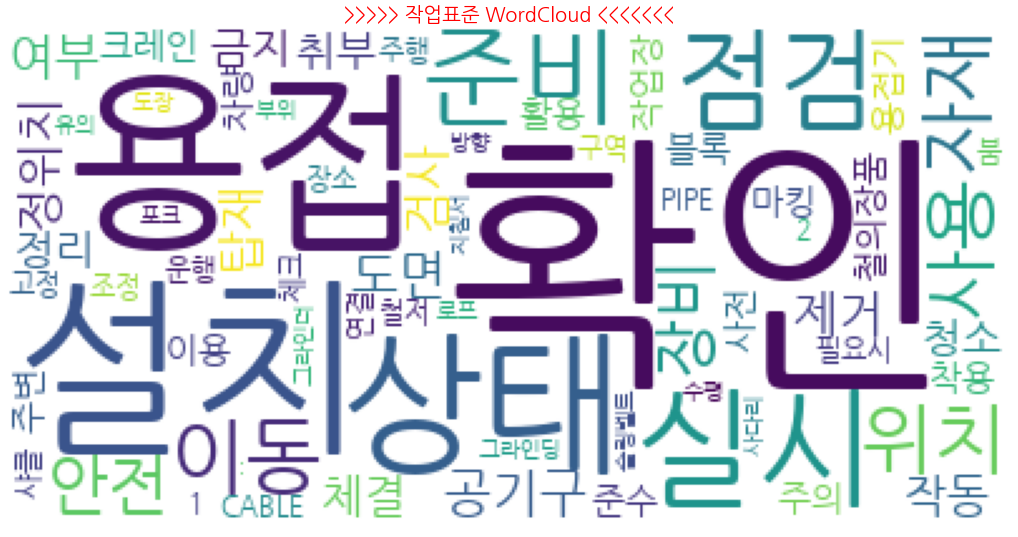

In [129]:
    nouns_counter = Counter(total_basket)
    cloud_data = dict(nouns_counter.most_common(70))
    
#     print(cloud_data)
    
    wc = WordCloud(background_color='white', font_path=fontpath)
    text = wc.generate_from_frequencies(cloud_data)
    figure = plt.figure(figsize=(18, 18))
    ax = figure.add_subplot(1, 1, 1)
    plt.title(">>>>> 작업표준 WordCloud <<<<<<<", fontsize=20, color='red')
    ax.axis('off')
    ax.imshow(wc)
    plt.savefig('./wordcloud.png')


In [118]:
import copy

In [119]:
df_visual = copy.deepcopy(df)

In [120]:
df_visual

,WORK_STAND_NM,WS_ID,WORK_UNIT,WORK_ACT,CHK_INFO,부서,대구분,중구분,소구분,keyword,위험_id,위험_id개수,R_vector
0,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,작업준비,도면 준비 및 자재/공구 준비,-,CHS공사부,후행의장,관철,장비&UNIT,"[, , 도면, 준비, 자재, 공구, 준비]",[],0,10.0
1,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 위치 확인,Dock 장 바닥 배열 가능 공간 확보 필요,CHS공사부,후행의장,관철,장비&UNIT,"[DOCK, 자재, 위치, 확인, 장, 바닥, 배열, 가능, 공간, 확보, 필요]",[],0,0.0
2,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,자재 입고 임시 적치,권상물 하부 인원 통제,CHS공사부,후행의장,관철,장비&UNIT,"[자재, 임시, 적치, 상물, 하부, 인원, 통제]",[idx_520],1,0.0
3,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치 준비,(Anchor Chain 배열 직전) 바닥 오염 방지 천막 배치,배열 전 바닥 오염 방지 천막 배치,CHS공사부,후행의장,관철,장비&UNIT,"[, ANCHOR, CHAIN, , 배열, 직전, 바닥, 오염, 방지, 배치, 배열...",[],0,0.0
4,ANCHOR류 설치 (ANCHOR CHAIN),WS_1,ANCHOR CHAIN 설치,Anchor 배열,Bell Mouth 또는 Anchor Pocket 직하부로 배치 (배치 조건 가능 확인),CHS공사부,후행의장,관철,장비&UNIT,"[ANCHOR, BELL, MOUTH, ANCHOR, POCKET, , , 배열, ...",[],0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23625,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,운전,"좌,우회전시 30M 전방에서 방향지시등 작동",,판넬조립부,기능,공통,차량운행,"[, 30M, 좌, 우회전, 전방, 방향, 지시, 작동]",[],0,0.0
23626,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,운전,교차로 진입 시 전방 좌우 확인,교차로 15Km/h 이하 운행,판넬조립부,기능,공통,차량운행,"[15KM/H, 교차로, 진입, 전방, 좌우, 확인, 교차로, 운행]",[],0,0.0
23627,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,주차,주정차 구역 확인 후 라인에 맞춰 주차,,판넬조립부,기능,공통,차량운행,"[주정차, 구역, 확인, 라인, 주차]",[],0,0.0
23628,화물차량(1/2.5/5ton) 운전 및 주정차,WS_1414,주차,주차 후 기어를 P로 놓고 주차 브레이크 체결,,판넬조립부,기능,공통,차량운행,"[P, 주차, 기어, 주차, 브레이크, 체결]",[],0,0.0
